## 2. MusicNet pitch differences

This tutorial demontrates the data using one recording as example. It depends on the NumPy, matplotlib, and intervaltree packages.

In [1]:
import numpy as np                      # fast vectors and matrices
import matplotlib.pyplot as plt         # plotting

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

import pickle

%matplotlib inline

### Constants

A recording of a musical performance is a real-valued time series. The values of this time series represent sound pressure variations sampled at regular intervals, in this case 44,100Hz. The human ear interprets pressure periodicities as musical notes.

In [104]:
fs = 44100      # samples/second

### Import
Import the recording with ID 2494. It's the String Quartet No 11 in F minor (midi note number 42) from Beethoven, frist movement Allegro con brio.

In [13]:
X = np.load(open('data/XX.npy','rb'), encoding='latin1')
Y = pickle.load(open('data/YY_label.p','rb'))

In [14]:
print "Python-Type of Music:",type(X)
print "The array has",len(X),"elements"
print "13100544 / (44100 s^{-1}) =",len(X) / fs,"seconds =", round(float(len(X))/fs/60,2),"minutes of recording."
print ""
print "Python-Type of Labels:",type(Y)

Python-Type of Music: <type 'numpy.ndarray'>
The array has 13100544 elements
13100544 / (44100 s^{-1}) = 297 seconds = 4.95 minutes of recording.

Python-Type of Labels: <class 'intervaltree.intervaltree.IntervalTree'>


### The Music
Extract frames of window size 16384 in music sample.

In [23]:
window = 16384
frames =  len(X) / window
print("Music sample contains {} windows of length {} seconds.".format(frames, float(window)/fs))


Music sample contains 799 windows of length 0.371519274376 seconds.


In [24]:
YY_per_window = np.zeros((frames, 128))

In [25]:
for i in range(frames):
    labels = Y[i*window]
    for label in labels:
        YY_per_window[i,label.data[1]] = 1
        

In [105]:
"""
fig = plt.figure(figsize=(15,7))
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24
for i in range(frames):
    for j in range(128):
        if YY_per_window[i,j] == 1:
            plt.plot(i, j, ls='', marker='.', c='royalblue')
"""

"\nfig = plt.figure(figsize=(15,7))\nplt.rcParams['xtick.labelsize']=24\nplt.rcParams['ytick.labelsize']=24\nfor i in range(frames):\n    for j in range(128):\n        if YY_per_window[i,j] == 1:\n            plt.plot(i, j, ls='', marker='.', c='royalblue')\n"

Now count the number of apearances of the different pitch jumps.

In [106]:
jumps = np.zeros(128)
#register first window
pitches = YY_per_window[0]

for i in range(1,frames):
    tmp = YY_per_window[i]
    for j in np.where(pitches==1)[0]:
        for k in np.where(tmp==1)[0]:
            jumps[np.abs(j-k)] += 1
    pitches = tmp
jumps = jumps / sum(jumps)

The plots shows that there are more and less probable pitch differences.

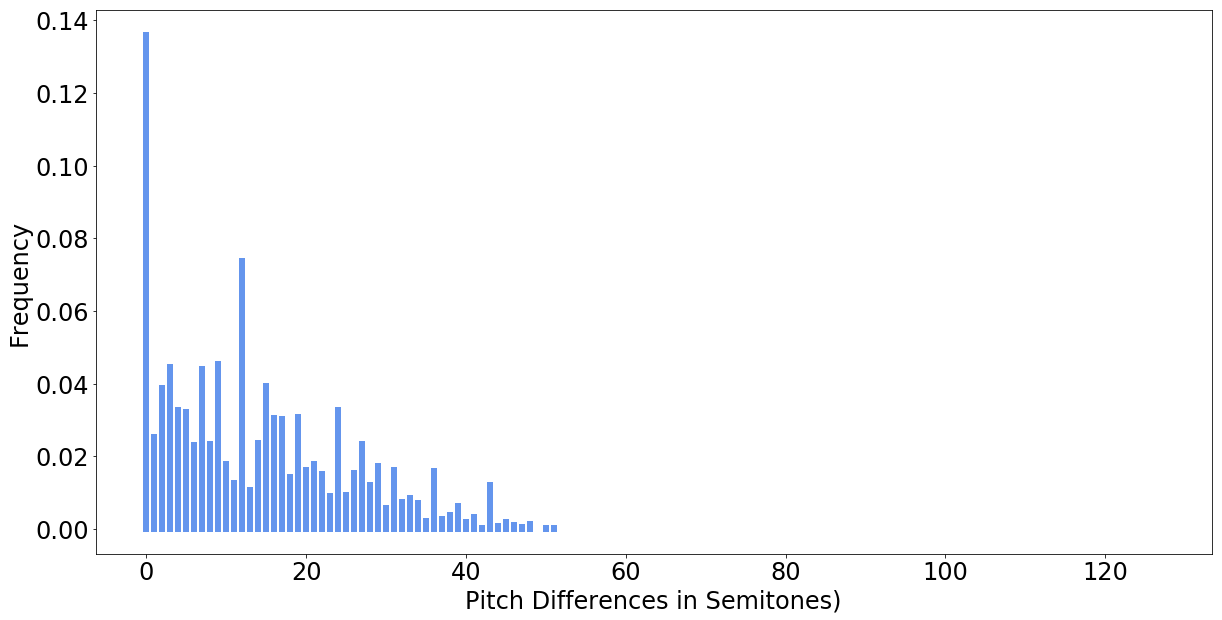

In [107]:
fig = plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24
for i in range(128):
    plt.plot([i,i],[0,jumps[i]], c='cornflowerblue', linewidth = 6)
plt.xlabel('Pitch Differences in Semitones)',fontsize=24)
plt.ylabel('Frequency',fontsize=24)

The most probable pitch differences (in half tones) are:

In [108]:
chords = ["Perfect unison", "Minor second", "Major second", "Minor third", "Major third", "Perfect fourth", 
          "Tritone", "Perfect fifth", "Minor sixth", "Major sixth", "Minor seventh", "Major seventh", 
          "Perfect octave", "", "", "", "", "", "", "", "", "", "", "", 
         "Double octave", ""]


In [109]:
print("Semitones\tChord\t\t\tFrequency of Pitch Difference ")
sorting = np.argsort(-jumps)
for i in range(30):
    if chords[min(sorting[i],25)] == "":
        print sorting[i],"\t\t",chords[min(sorting[i],25)],"\t\t\t",np.round(jumps[sorting[i]]*100,2),"%"
    else:
        print sorting[i],"\t\t",chords[min(sorting[i],25)],"\t\t",np.round(jumps[sorting[i]]*100,2),"%"

Semitones	Chord			Frequency of Pitch Difference 
0 		Perfect unison 		13.59 %
12 		Perfect octave 		7.38 %
9 		Major sixth 		4.54 %
3 		Minor third 		4.45 %
7 		Perfect fifth 		4.41 %
15 					3.92 %
2 		Major second 		3.89 %
24 		Double octave 		3.28 %
4 		Major third 		3.27 %
5 		Perfect fourth 		3.23 %
19 					3.08 %
16 					3.05 %
17 					3.02 %
1 		Minor second 		2.54 %
14 					2.36 %
8 		Minor sixth 		2.35 %
27 					2.34 %
6 		Tritone 		2.31 %
21 					1.79 %
10 		Minor seventh 		1.79 %
29 					1.74 %
20 					1.64 %
31 					1.63 %
36 					1.59 %
26 					1.53 %
22 					1.52 %
18 					1.44 %
11 		Major seventh 		1.26 %
43 					1.22 %
28 					1.21 %


In [ ]:
print("Semitones & Chord & Frequency of Pitch Difference ")
sorting = np.argsort(-jumps)
for i in range(30):
    print sorting[i]," & ",chords[min(sorting[i],25)]," & ",np.round(jumps[sorting[i]]*100,2),"\%"